In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./datasets/sleep_Modeling.csv', index_col = [0])
df.head()

,awake_time,start_work,end_work,bed_time_work_tomorrow,no_work_awake_time,bed_time_no_work_tomorrow,usual_sleep_per_night,naps_per_month,length_of_average_nap,employment_status,...,highest_edu_Some college,highest_edu_Some high school,highest_edu_Vocational/Tech school,single_dual_household_Single income,"house_hold_income_bracket_$25,001 - $35,000","house_hold_income_bracket_$35,001 - $50,000","house_hold_income_bracket_$50,001 - $75,000","house_hold_income_bracket_More than $100,000",house_hold_income_bracket_NA,"house_hold_income_bracket_Under $15,000"
0,7:00 AM – 7:14 AM,9:00 AM – 9:14 AM,6:45 AM – 6:59 AM,8:45 AM – 8:59 AM,7:00 AM – 7:14 AM,8:30 AM – 8:44 AM,7.000000,0,0.0,1,...,1,0,0,1,0,1,0,0,0,0
1,5:00 AM – 5:14 AM,7:00 AM – 7:14 AM,7:00 AM – 7:14 AM,7:15 AM – 7:29 AM,7:00 AM – 7:14 AM,7:45 AM – 7:59 AM,6.000000,25,15.0,2,...,0,0,1,0,0,1,0,0,0,0
2,12:01 AM – 4:59 AM,5:00 AM – 5:14 AM,7:15 AM – 7:29 AM,7:45 AM – 7:59 AM,7:00 AM – 7:14 AM,7:45 AM – 7:59 AM,5.000000,0,0.0,2,...,1,0,0,0,0,0,0,1,0,0
3,5:45 AM – 5:59 AM,7:00 AM – 7:14 AM,6:30 AM – 6:44 AM,8:45 AM – 8:59 AM,8:00 AM – 8:14 AM,12:00 AM,6.500000,10,60.0,2,...,1,0,0,0,0,1,0,0,0,0
4,12:01 AM – 4:59 AM,8:30 AM – 8:44 AM,7:15 AM – 7:29 AM,8:15 AM – 8:29 AM,5:30 AM – 5:44 AM,8:45 AM – 8:59 AM,6.655158,1,60.0,2,...,0,0,0,0,0,0,0,1,0,0


In [3]:
condition_col = 'has_condition'

In [4]:
# #Undersample non-target observations

# df_no = df[df[condition_col] == 0]
# df_no = df_no[:250]
# df= pd.concat([df_no, df[df[condition_col] == 1]])
# df.shape

In [5]:
# Select target
y = df[condition_col]

In [6]:
#Features - Treated for columns will be used as targets. Other columns to be used as targets:
treated = [x for x in df.columns if x[:8] == 'treated_']
marital = [x for x in df.columns if x[:8] == 'marital_']
edu = [x for x in df.columns if x[:8] == 'highest_']
income = [x for x in df.columns if x[:8] == 'house_']
start_work = [x for x in df.columns if x[:12] == 'start_work_']
end_work = [x for x in df.columns if x[:9] == 'end_work_']
extra_cols = ['age','poor_sleep', 'has_condition', 'avg_weekly_hours_worked',
              'single_dual_household_Single income','employment_status']
bed_time_work = [x for x in df.columns if x[:len('bed_time_work_tomorrow_')] == 'bed_time_work_tomorrow_']
bed_time_no_work = [x for x in df.columns if x[:len('bed_time_no_work_tomorrow_')] == 'bed_time_no_work_tomorrow_']
no_work = [x for x in df.columns if x[:len('no_work_awake_time_')] == 'no_work_awake_time_']
awake = [x for x in df.columns if x[:11] == 'awake_time_']

In [7]:
# X = df[awake + no_work + bed_time_work + ['naps_per_month', 'length_of_average_nap']]

In [8]:
#Select independent variables
X = df[['usual_sleep_per_night','unconvential_awake_time', 'naps_per_month', 'length_of_average_nap']]

In [9]:
for i in X.columns:
    print(i)

usual_sleep_per_night
unconvential_awake_time
naps_per_month
length_of_average_nap


**Baseline:**

In [10]:
#Find t**Spilt the data into test/train**e baseline score

df[condition_col].value_counts(normalize = True)[1]

0.37

**Spilt the data into test/train**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

**Use SMOTE to fix class imbalances**

In [12]:
os = SMOTE(k_neighbors=3, sampling_strategy='auto', n_jobs = -1)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [13]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: has_condition, dtype: float64

**Logistic Regression with GridsearchCV**

In [14]:
# lr = LogisticRegression(n_jobs=-1, random_state = 42)


# pipe = Pipeline([('lr', lr)])

# prms = {'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
#         'lr__class_weight':['balanced', 'uniform'],
#         'lr__C': [.001, .01, .1, .5, 1, 3]}

# gs_lr = GridSearchCV(pipe, param_grid= prms, n_jobs = -1)

# gs_lr.fit(X_train, y_train)

# gs_lr.best_params_

In [15]:
lr = LogisticRegression(n_jobs=-1, random_state = 42)


pipe = Pipeline([('lr', lr)])

prms = {'lr__penalty': ['l1', 'l2', 'elasticnet','none'],
       'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'lr__class_weight': ['balanced', 'uniform'],
       'lr__C': [.001, .01, .1],
       'lr__fit_intercept': [True, False]}

gs_lr = GridSearchCV(pipe, param_grid= prms, n_jobs = -1)

gs_lr.fit(X_train, y_train)

gs_lr.best_params_

{'lr__C': 0.001,
 'lr__class_weight': 'uniform',
 'lr__fit_intercept': True,
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cg'}

In [16]:
gs_lr.best_score_

0.5604593890599101

In [17]:
gs_lr.score(X_train, y_train)

0.5467836257309941

In [18]:
gs_lr.score(X_test, y_test)

0.525

**Testing Confusion Matrix**

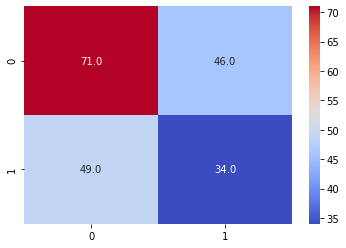

In [19]:
preds = gs_lr.predict(X_test)

cmx = confusion_matrix(y_test, preds)
sns.heatmap(cmx, annot = True, cmap = 'coolwarm', fmt = '.1f');

In [20]:
print('Precision:', round(precision_score(y_test, preds),2))
print('Accuracy:', round(accuracy_score(y_test, preds),2))
print('Recall:', round(recall_score(y_test, preds),2))
print('F1: ', round(f1_score(y_test, preds),2))

Precision: 0.42
Accuracy: 0.52
Recall: 0.41
F1:  0.42


Throughout most stages of modeling, the Logistic Regression model was slightly underfit with training scores performing better than testing. Accuracy and f1 scores were generally low.

Grid Search best parameters:
- lr__C: 0.001,
- lr__class_weight: uniform,
- lr__fit_intercept: True,
- lr__penalty: l2,
- lr__solver: newton-cg